In [2]:
import sys

sys.path.insert(0, '../../../')
from aqua import Reader
sys.path.insert(0, '../')
from index import *
from plots import *
from tools import *

In [3]:
machine   = 'levante'
diagname  = 'teleconnections'
telecname = 'MJO'
exp       = 'ERA5'

config   = load_config(machine,configdir='../../../config/')
namelist = load_namelist(diagname,configdir='../')

field = config[diagname][telecname][exp]['var']

In [4]:
configdir = '../../../config/'

reader = Reader(model='ERA5',exp='era5',source='monthly_acc',configdir=configdir,regrid='r200')

In [5]:
data = reader.retrieve()

In [6]:
# Preparing data
year = [1983,1986]
sec_month = 2.628e6 # seconds per month
sec_day = 8.64e4
latN = namelist[telecname]['latN']
latS = namelist[telecname]['latS']
lonW = namelist[telecname]['lonW']
lonE = namelist[telecname]['lonE']

infile = data[field]
infile = infile.sel(time=slice(str(year[0]),str(year[1])))
infile = reader.regrid(infile)
infile = area_selection(infile,lat=[latS,latN],lon=[lonW,lonE])
infile = infile/sec_month

In [7]:
# Anomalies
infile = infile.groupby('time.month') - infile.groupby('time.month').mean('time')

(<Figure size 1200x800 with 2 Axes>,
 <Axes: title={'center': 'Hovmoller Plot (lat mean)'}, xlabel='lon', ylabel='time'>)

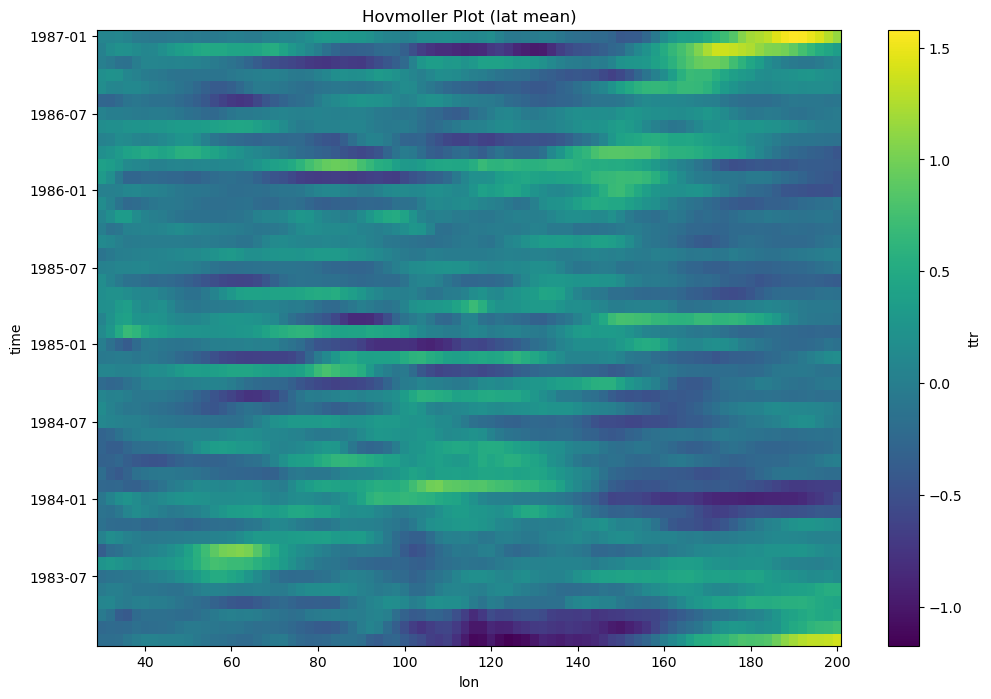

In [8]:
hovmoller_plot(infile,dim='lat',invert_axis=True,contour=False,levels=13)

In [50]:
def hovmoller_plot2(infile,dim='lon',title=None, xlabel=None,ylabel=None,
                   contour=True,levels=8,xlog=False,ylog=False,xlim=None,
                   ylim=None,invert_axis=False,save=False, outputdir='./',
                   filename='hovmoller.png'):
    '''
    Args:
        infile (DataArray):     DataArray to be plot
        dim (str,opt):          dimension to be averaged over, default is 'lon'
        title (str,opt):        title of the plot
        xlabel (str,opt):       label of the x axis
        ylabel (str,opt):       label of the y axis
        contour (bool,opt):     enable or disable contour plot, default is True
        levels (int,opt):       number of contour levels, default is 8
        xlog (bool,opt):        enable or disable x axis log scale, default is False
        ylog (bool,opt):        enable or disable y axis log scale, default is False
        xlim (tuple,opt):       x axis limits
        ylim (tuple,opt):       y axis limits
        invert_axis (bool,opt): enable or disable axis inversion, default is False
        save (bool,opt):        enable or disable saving the figure, default is False
        outputdir (str,opt):    output directory for the figure, default is './'
        filename (str,opt):     filename for the figure, default is 'hovmoller.png'
    
    Returns:
        fig (Figure):           Figure object
        ax (Axes):              Axes object
    '''
    infile_mean = infile.mean(dim=dim,keep_attrs=True)

    fig, ax = plt.subplots(figsize=(12, 16))
    
    cmap = plt.colormaps['coolwarm']

    # Contour or pcolormesh plot
    if contour:
        if invert_axis:
            im = ax.contourf(infile_mean.coords[infile_mean.dims[-1]], infile_mean.coords['time'], 
                             infile_mean,levels=levels,cmap=cmap)
        else:
            im = ax.contourf(infile_mean.coords['time'], infile_mean.coords[infile_mean.dims[-1]], 
                         infile_mean.T,levels=levels)
    else:
        if invert_axis:
            im = ax.pcolormesh(infile_mean.coords[infile_mean.dims[-1]], infile_mean.coords['time'], 
                               infile_mean)
        else:
            im = ax.pcolormesh(infile_mean.coords['time'], infile_mean.coords[infile_mean.dims[-1]], infile_mean.T)
        
    # Colorbar
    try:
        cbar_label = infile_mean.name
        cbar_label += ' [' + infile_mean.units + ']'
        print(cbar_label)
        plt.colorbar(im, ax=ax, label=cbar_label,cmap=cmap)
    except AttributeError:
        plt.colorbar(im, ax=ax, label=infile_mean.name)
    
    set_layout(fig,ax,title=title,xlabel=xlabel,ylabel=ylabel,
               xlog=xlog,ylog=ylog,xlim=xlim,ylim=ylim)
    
    # Custom labels if provided
    if xlabel == None:
        if invert_axis:
            ax.set_xlabel(infile_mean.dims[-1])
        else:
            ax.set_xlabel('time')
    if ylabel == None:
        if invert_axis:
            ax.set_ylabel('time')
        else:
            ax.set_ylabel(infile_mean.dims[-1])
    if title == None:
        ax.set_title(f'Hovmoller Plot ({dim} mean)')
    if save:
        fig.savefig(outputdir + filename)
    
    return fig, ax


(<Figure size 1200x1600 with 2 Axes>,
 <Axes: title={'center': 'Hovmoller Plot (lat mean)'}, xlabel='lon', ylabel='time'>)

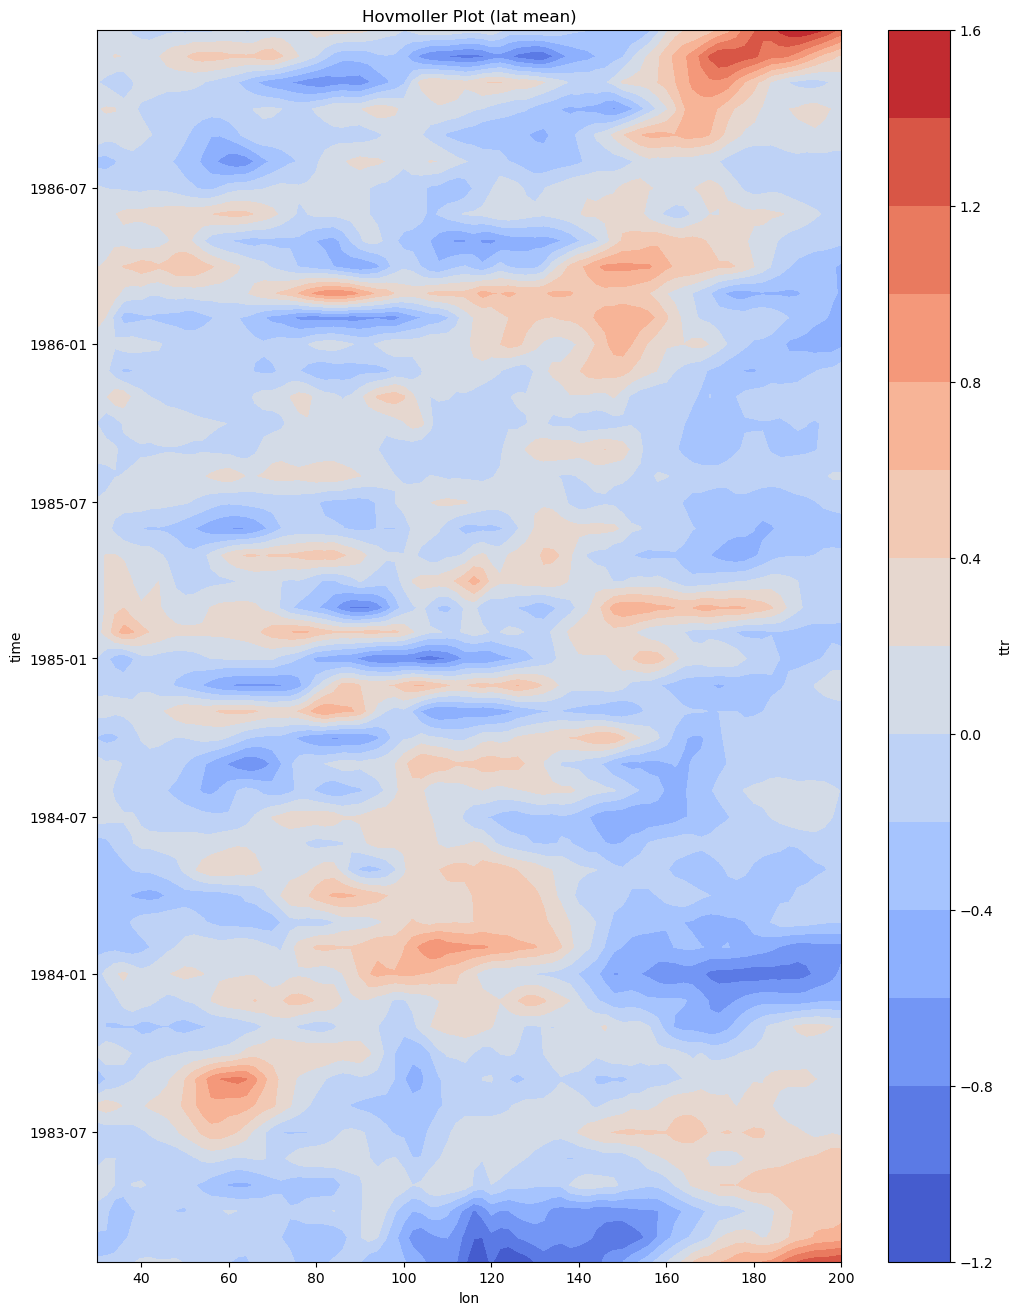

In [51]:
hovmoller_plot2(infile,dim='lat',invert_axis=True,contour=True,levels=13)